# Hints about  Hyper Parameter Tuning


*   Grid Search
*   Random Search

---


Sequential Model Based Tuning Ways 

*   Metric Optimization Engine (MOE)
*   Sk-learn optimize hyperopt(Skopt)

# **UnSupervised Learning**
We 've went to learn so far many applications in Supervised learning whether Classifiers or Regressors now its your time to meet a new appearance for Machine Learning which is Unsupervised Learning 

# Clustering 


# K-means

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir('drive/MyDrive/Fusion')

In [8]:
!ls


 50_Startups.csv	   Insurance.xlsx       Social_Network_Ads.csv
 boston.csv		   Mall_Customers.csv   unprocessed_data.csv
'Concrete_Data (4).xlsx'   Salary_Data.csv
 diabetes_null.csv	   slr02.xlsx


In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [10]:
from sklearn.cluster import KMeans


In [11]:
a= np.array([10,11,12,200,220,350,360])
a=a.reshape(-1,1)

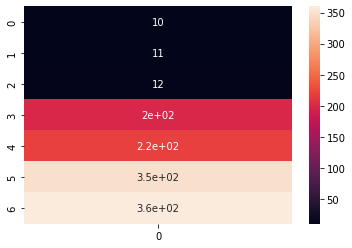

In [12]:
import seaborn as sns 
g= sns.heatmap(a, annot= True)

In [13]:
clust=KMeans(n_clusters=3, random_state=3)
clust.fit(a)

KMeans(n_clusters=3, random_state=3)

In [14]:
preds=clust.predict(a)
preds

array([0, 0, 0, 1, 1, 2, 2], dtype=int32)

As We see, We could easily build a K mean Model 
Now  Let's Go for a real World Data Set and see how can this be Challenging.

In [15]:
# read our dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
features = dataset.iloc[:, 1:].values
# Pre Processing Phase
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features[:,0] = encoder.fit_transform(features[:,0])

pd.DataFrame(features)

,0,1,2,3
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans_predictions = kmeans.fit_predict(features)
kmeans_predictions

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

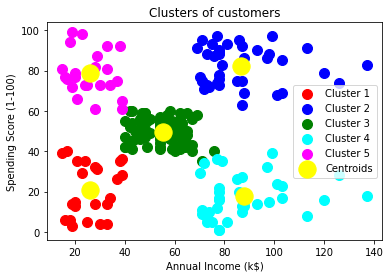

In [18]:
# Visualising the clusters
plt.scatter(features[kmeans_predictions == 0, 2], features[kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(features[kmeans_predictions == 1, 2], features[kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(features[kmeans_predictions == 2, 2], features[kmeans_predictions == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(features[kmeans_predictions == 3, 2], features[kmeans_predictions == 3, -1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(features[kmeans_predictions == 4, 2], features[kmeans_predictions == 4, -1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**NOTE:** Always whenever you face something in Syntax that you can't understand try to break it like this 

In [19]:
features[kmeans_predictions == 0, -1]

array([39, 6, 40, 6, 3, 14, 15, 13, 35, 29, 35, 5, 14, 32, 31, 4, 4, 14,
       17, 26, 35, 36, 28], dtype=object)

In [20]:
features[kmeans_predictions == 0, 2]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=object)

In [21]:
features[kmeans_predictions == 0, 1]

array([19, 20, 31, 35, 64, 67, 58, 37, 35, 52, 35, 46, 54, 45, 40, 60, 53,
       49, 42, 36, 65, 48, 49], dtype=object)

In [22]:
kmeans_predictions == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
features[kmeans_predictions == 0, -1]

array([39, 6, 40, 6, 3, 14, 15, 13, 35, 29, 35, 5, 14, 32, 31, 4, 4, 14,
       17, 26, 35, 36, 28], dtype=object)

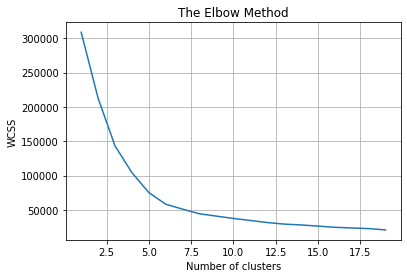

In [26]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

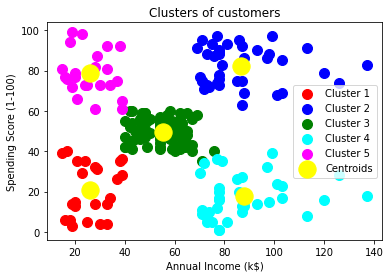

In [27]:
# build a 5 clusters algorithm
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans_predictions = kmeans.fit_predict(features)

# visualizing it
# Visualising the clusters
plt.scatter(features[kmeans_predictions == 0, 2], features[kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(features[kmeans_predictions == 1, 2], features[kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(features[kmeans_predictions == 2, 2], features[kmeans_predictions == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(features[kmeans_predictions == 3, 2], features[kmeans_predictions == 3, -1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(features[kmeans_predictions == 4, 2], features[kmeans_predictions == 4, -1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

# Agglomerative Heirarichal Clustering

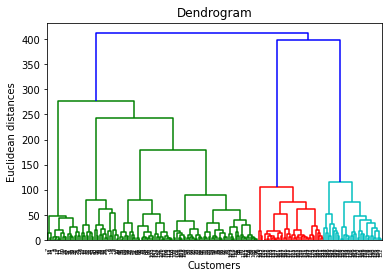

In [29]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(features, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(features)

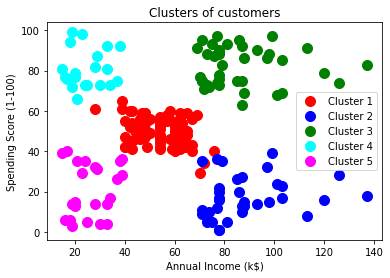

In [31]:
plt.scatter(features[y_hc == 0, 2], features[y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(features[y_hc == 1, 2], features[y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(features[y_hc == 2, 2], features[y_hc == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(features[y_hc == 3, 2], features[y_hc == 3, -1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(features[y_hc == 4, 2], features[y_hc == 4, -1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Do you remember Heatmaps ?

In [32]:
# Let's Create Random Data
import seaborn as sns
g=np.random.random([20,10])
g

array([[0.34666576, 0.25577785, 0.143234  , 0.47170182, 0.40530989,
        0.91668683, 0.90301419, 0.07822947, 0.61736534, 0.87819498],
       [0.8440733 , 0.54433698, 0.65570812, 0.80889829, 0.56483752,
        0.0422767 , 0.29046562, 0.3200529 , 0.0271878 , 0.53179078],
       [0.47322931, 0.24738903, 0.16774927, 0.84206533, 0.69438564,
        0.13664589, 0.44109918, 0.95133525, 0.88998647, 0.72884458],
       [0.46903923, 0.48477565, 0.89732229, 0.43473293, 0.6975871 ,
        0.35212196, 0.46779955, 0.51708831, 0.61568659, 0.45122796],
       [0.77671996, 0.35794301, 0.55401116, 0.989216  , 0.1517481 ,
        0.02246586, 0.21049999, 0.09573368, 0.6445926 , 0.60695544],
       [0.31762966, 0.02174081, 0.98950632, 0.8374969 , 0.37386697,
        0.87218509, 0.85760147, 0.59685147, 0.32693533, 0.03760937],
       [0.3021761 , 0.44232647, 0.65529939, 0.45486471, 0.46558444,
        0.44876766, 0.02986545, 0.0747859 , 0.05673449, 0.06540356],
       [0.19016113, 0.88659321, 0.1033313

In [33]:
pd.DataFrame(g)

,0,1,2,3,4,5,6,7,8,9
0,0.346666,0.255778,0.143234,0.471702,0.405310,0.916687,0.903014,0.078229,0.617365,0.878195
1,0.844073,0.544337,0.655708,0.808898,0.564838,0.042277,0.290466,0.320053,0.027188,0.531791
2,0.473229,0.247389,0.167749,0.842065,0.694386,0.136646,0.441099,0.951335,0.889986,0.728845
3,0.469039,0.484776,0.897322,0.434733,0.697587,0.352122,0.467800,0.517088,0.615687,0.451228
4,0.776720,0.357943,0.554011,0.989216,0.151748,0.022466,0.210500,0.095734,0.644593,0.606955
5,0.317630,0.021741,0.989506,0.837497,0.373867,0.872185,0.857601,0.596851,0.326935,0.037609
6,0.302176,0.442326,0.655299,0.454865,0.465584,0.448768,0.029865,0.074786,0.056734,0.065404
7,0.190161,0.886593,0.103331,0.349627,0.108904,0.443499,0.281771,0.323511,0.910333,0.515921
8,0.810360,0.602925,0.850991,0.940344,0.657739,0.704840,0.919887,0.260818,0.299460,0.520897
9,0.089660,0.814975,0.949159,0.846156,0.991782,0.422324,0.836047,0.732418,0.141642,0.749854


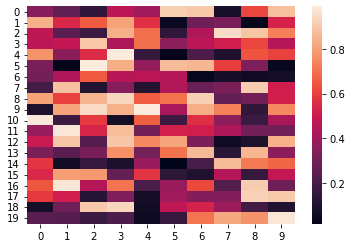

In [34]:
sns.heatmap(g)

In [35]:
b=sns.load_dataset('iris')
b

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
k=b.pop('species')
k

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

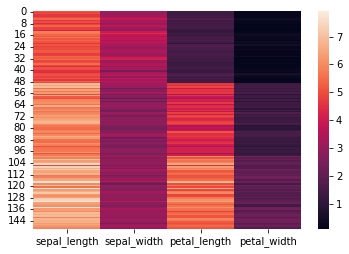

In [37]:
sns.heatmap(b)

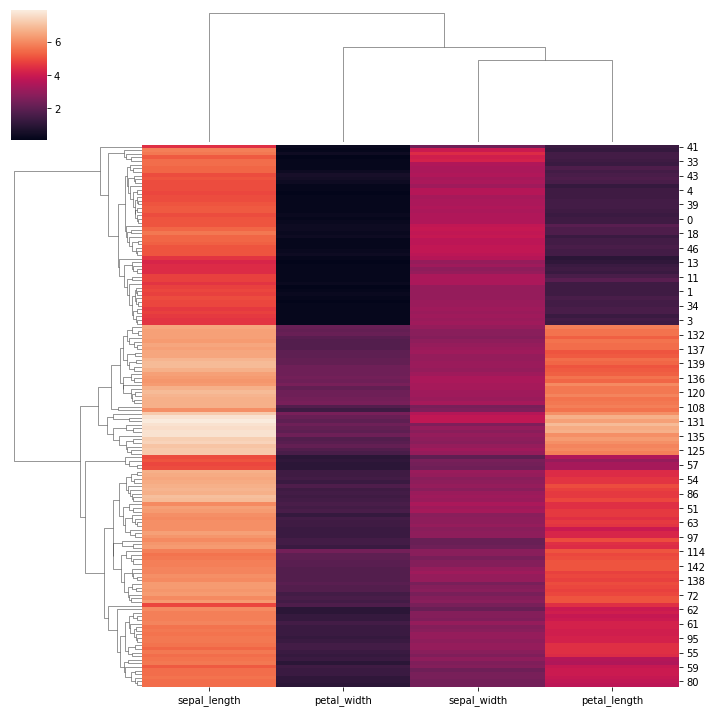

In [38]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris,metric='euclidean')

![alt text](https://dataaspirant.com/wp-content/uploads/2015/04/cover_post_final.png)

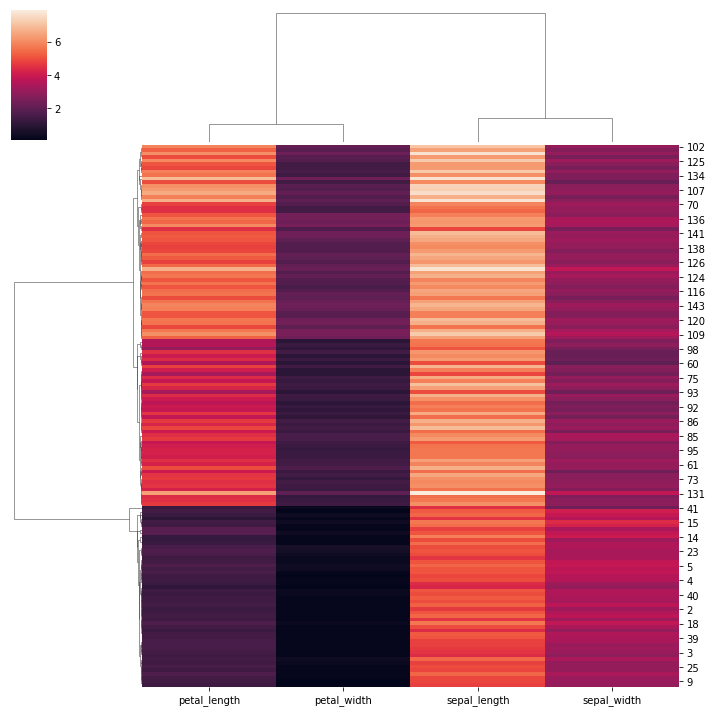

In [39]:
g = sns.clustermap(iris,metric='cosine')

**Please** visit this [Link](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

# PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(iris.values) 
feats = pca.transform(iris.values)

In [41]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [42]:
from sklearn import datasets
from sklearn.preprocessing import scale

# load iris dataset
iris = datasets.load_iris()
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4'], index=iris.feature_names)
loadings


,PC1,PC2,PC3,PC4
sepal length (cm),0.361387,0.656589,-0.582030,-0.315487
sepal width (cm),-0.084523,0.730161,0.597911,0.319723
petal length (cm),0.856671,-0.173373,0.076236,0.479839
petal width (cm),0.358289,-0.075481,0.545831,-0.753657


In [43]:
pca.components_  #  We use  .T   to Transpose our Pcs  to be Columns instead of being Rows

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])